# <center> Marketing Success Prediction </center>

## <center> Author: Sunil Kumar R M </center>
    
<center>Email: ping.sunilk@gmail.com | LinkedIn: @sunkumx | Github: @sunkumx
</center>

### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

### Overview


<div style="text-align: justify;">
The problem of analyzing the effectiveness of direct marketing campaigns for a Portuguese banking institution, particularly in predicting clients' subscription to a bank term deposit, is approached systematically using the CRISP-DM framework. By following CRISP-DM's structured methodology, the project team collects, preprocesses, and analyzes relevant data on clients' demographics, contact details, previous campaign outcomes, and subscription status. Through phases such as <b>Business Understanding, Data Preparation, Modeling, Evaluation, and Deployment</b>, the team gains valuable insights into factors influencing subscription decisions, develops predictive models to forecast subscription likelihood, evaluates model performance, and ultimately provides actionable recommendations for optimizing future marketing campaigns. This structured approach ensures that the problem is addressed comprehensively, leading to informed decision-making and improved campaign strategies for the banking institution.
</div>

# Phase 1: Business Understanding

1. Business Objective:
    - Understand the effectiveness of direct marketing campaigns for a Portuguese banking institution.
    - Determine factors influencing clients' subscription to a bank term deposit.


2. Background:
    - The data pertains to phone-based marketing campaigns conducted by the bank.
    - The primary goal is to analyze customer responses to these campaigns and predict whether a client will subscribe to a bank term deposit or not.


3. Stakeholders:
    - Marketing team: Interested in improving campaign strategies to increase subscription rates.
    - Sales team: Concerned with converting leads into subscriptions to meet revenue targets.
    - Management: Requires insights for decision-making related to resource allocation and campaign optimization.


4. Business Questions:
    - What factors contribute to the success or failure of marketing campaigns?
    - How do demographic factors (age, job, education, etc.) influence subscription rates?
    - Can we identify patterns or trends in customer behavior that indicate subscription likelihood?
    - What strategies can be implemented to improve subscription rates?


5. Data Availability:
    - The dataset contains information on clients' demographics, contact details, previous campaign outcomes, and whether they subscribed to the bank term deposit.
    - Attributes include age, job, marital status, education, balance, contact method, campaign outcomes, etc.
    - The dataset allows for analyzing historical campaign performance and customer behavior.-


6. Success Criteria:
    - Increased subscription rate compared to previous campaigns.
    - Identification of key factors influencing subscription decisions.
    - Development of predictive models with high accuracy in determining subscription likelihood.


7. Risks and Assumptions:
    - Risks: Potential biases in the data, changing customer preferences, external economic factors affecting subscription behavior.
    - Assumptions: The dataset accurately represents the target population, customer responses are consistent across campaigns, and campaign execution remains constant.


8. Constraints:
    - Limited budget and resources for implementing campaign improvements.
    - Time constraints for analyzing data and providing actionable insights.


9. Deliverables:
    - Report on factors influencing subscription rates and recommendations for campaign optimization.
    - Presentation outlining key findings and actionable insights for stakeholders.


10. Project Plan:
    - Data Collection: Gather relevant datasets from the banking institution's records.
    - Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
    - Exploratory Data Analysis: Analyze data distributions, correlations, and identify patterns.
    - Feature Engineering: Create new features or transform existing ones to improve model performance.
    - Model Building: Develop predictive models to forecast subscription likelihood.
    - Model Evaluation: Evaluate models using appropriate metrics and fine-tune for optimal performance.
    - Interpretation and Recommendations: Interpret model results, derive insights, and provide actionable recommendations.
    - Documentation and Reporting: Document the entire process, findings, and recommendations for stakeholders.

# Phase 2: Data Preparation

**Data dictionary**

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes:**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Dataset Description**

| Description | Type |
|:----------|:----------|
|  Dataset Characteristics  |   **Multivariate**   |
|  Subject Area   |   **Business**   |
|  Associated Tasks   |   **Classification**   |
|  Feature Type  |   **Categorical, Integer**   |
|  Instances  |   **45211**   |
|  Features  |   **16**   |


### **Installing dependencies**

In [1]:
!pip install chart_studio -q

In [2]:
!pip install squarify -q

### **Importing necessary libraries and loading dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
df = pd.read_csv('marketing-data.csv')
term_deposits = df.copy()

In [54]:
import warnings
warnings.filterwarnings("ignore")

**Basic eyeballing of the data**

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome is_success  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no

In [5]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

<h3> Exploring the Basics </h3>

<ul>
<li type="round"> <b>Mean Age</b> is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)</li><br>
<li type="round"> The <b>mean balance</b> is <b>1362.27</b>. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
<li type="round">As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, <b>duration is obtained after the call is made to the potential client</b> so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit  is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. </li><br>
</ul>

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**

**Checking for missing values**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


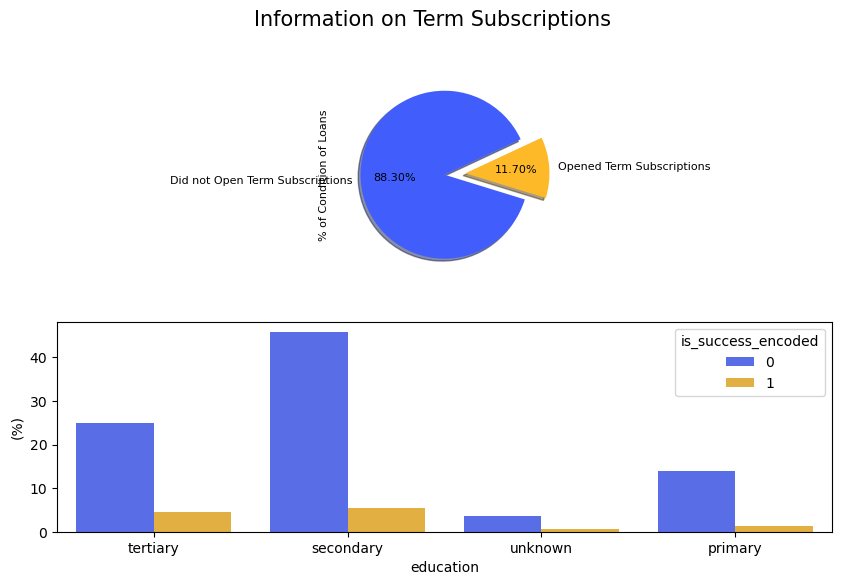

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'is_success' column
df['is_success_encoded'] = label_encoder.fit_transform(df['is_success'])

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Set colors and labels
colors = ['#415efd', '#fdb928']
labels = ["Did not Open Term Subscriptions", "Opened Term Subscriptions"]

# Title
plt.suptitle('Information on Term Subscriptions', fontsize=15)

# Plot pie chart
df["is_success_encoded"].value_counts().plot(kind='pie', explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             colors=colors, labels=labels, fontsize=8, startangle=25)

# Set ylabel
ax[0].set_ylabel('% of Condition of Loans', fontsize=8)

# Plot bar chart
palette = ['#415efd', '#fdb928']
sns.barplot(x="education", y="is_success_encoded", hue="is_success_encoded", data=df, palette=palette, ax=ax[1],
            estimator=lambda x: len(x) / len(df) * 100)

# Set ylabel and rotate xtick labels
ax[1].set_ylabel("(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0)

# Show plot
plt.show()

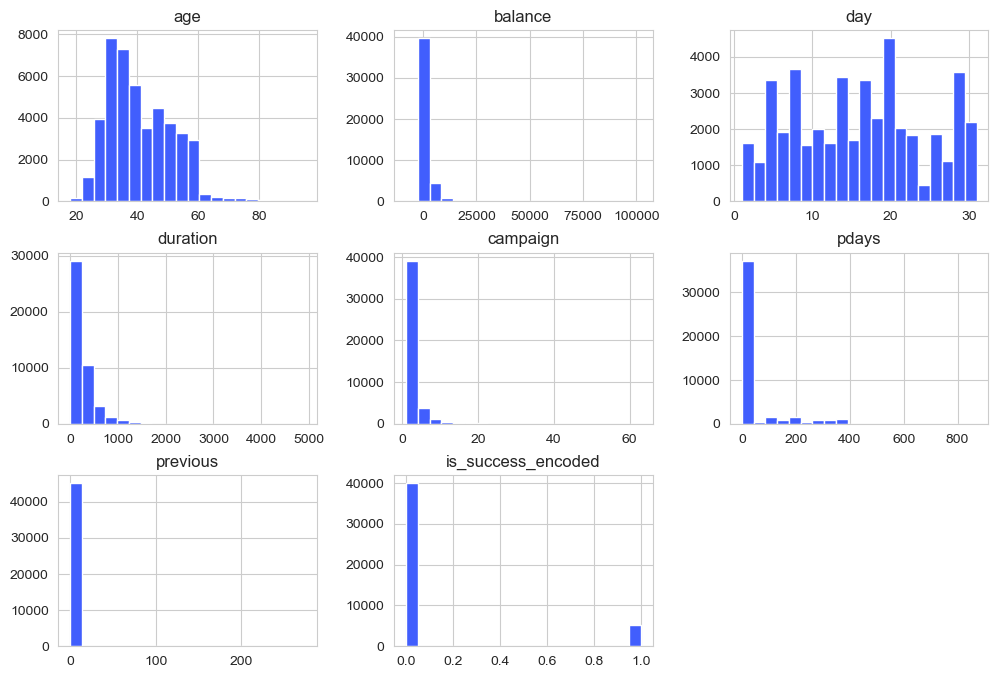

In [21]:
# Let's see how the numeric data is distributed.
import seaborn as sns
sns.set_style("whitegrid")
df.hist(bins=20, figsize=(12,8), color='#415efd')
plt.show()

In [22]:
df['is_success'].value_counts()

no     39922
yes     5289
Name: is_success, dtype: int64

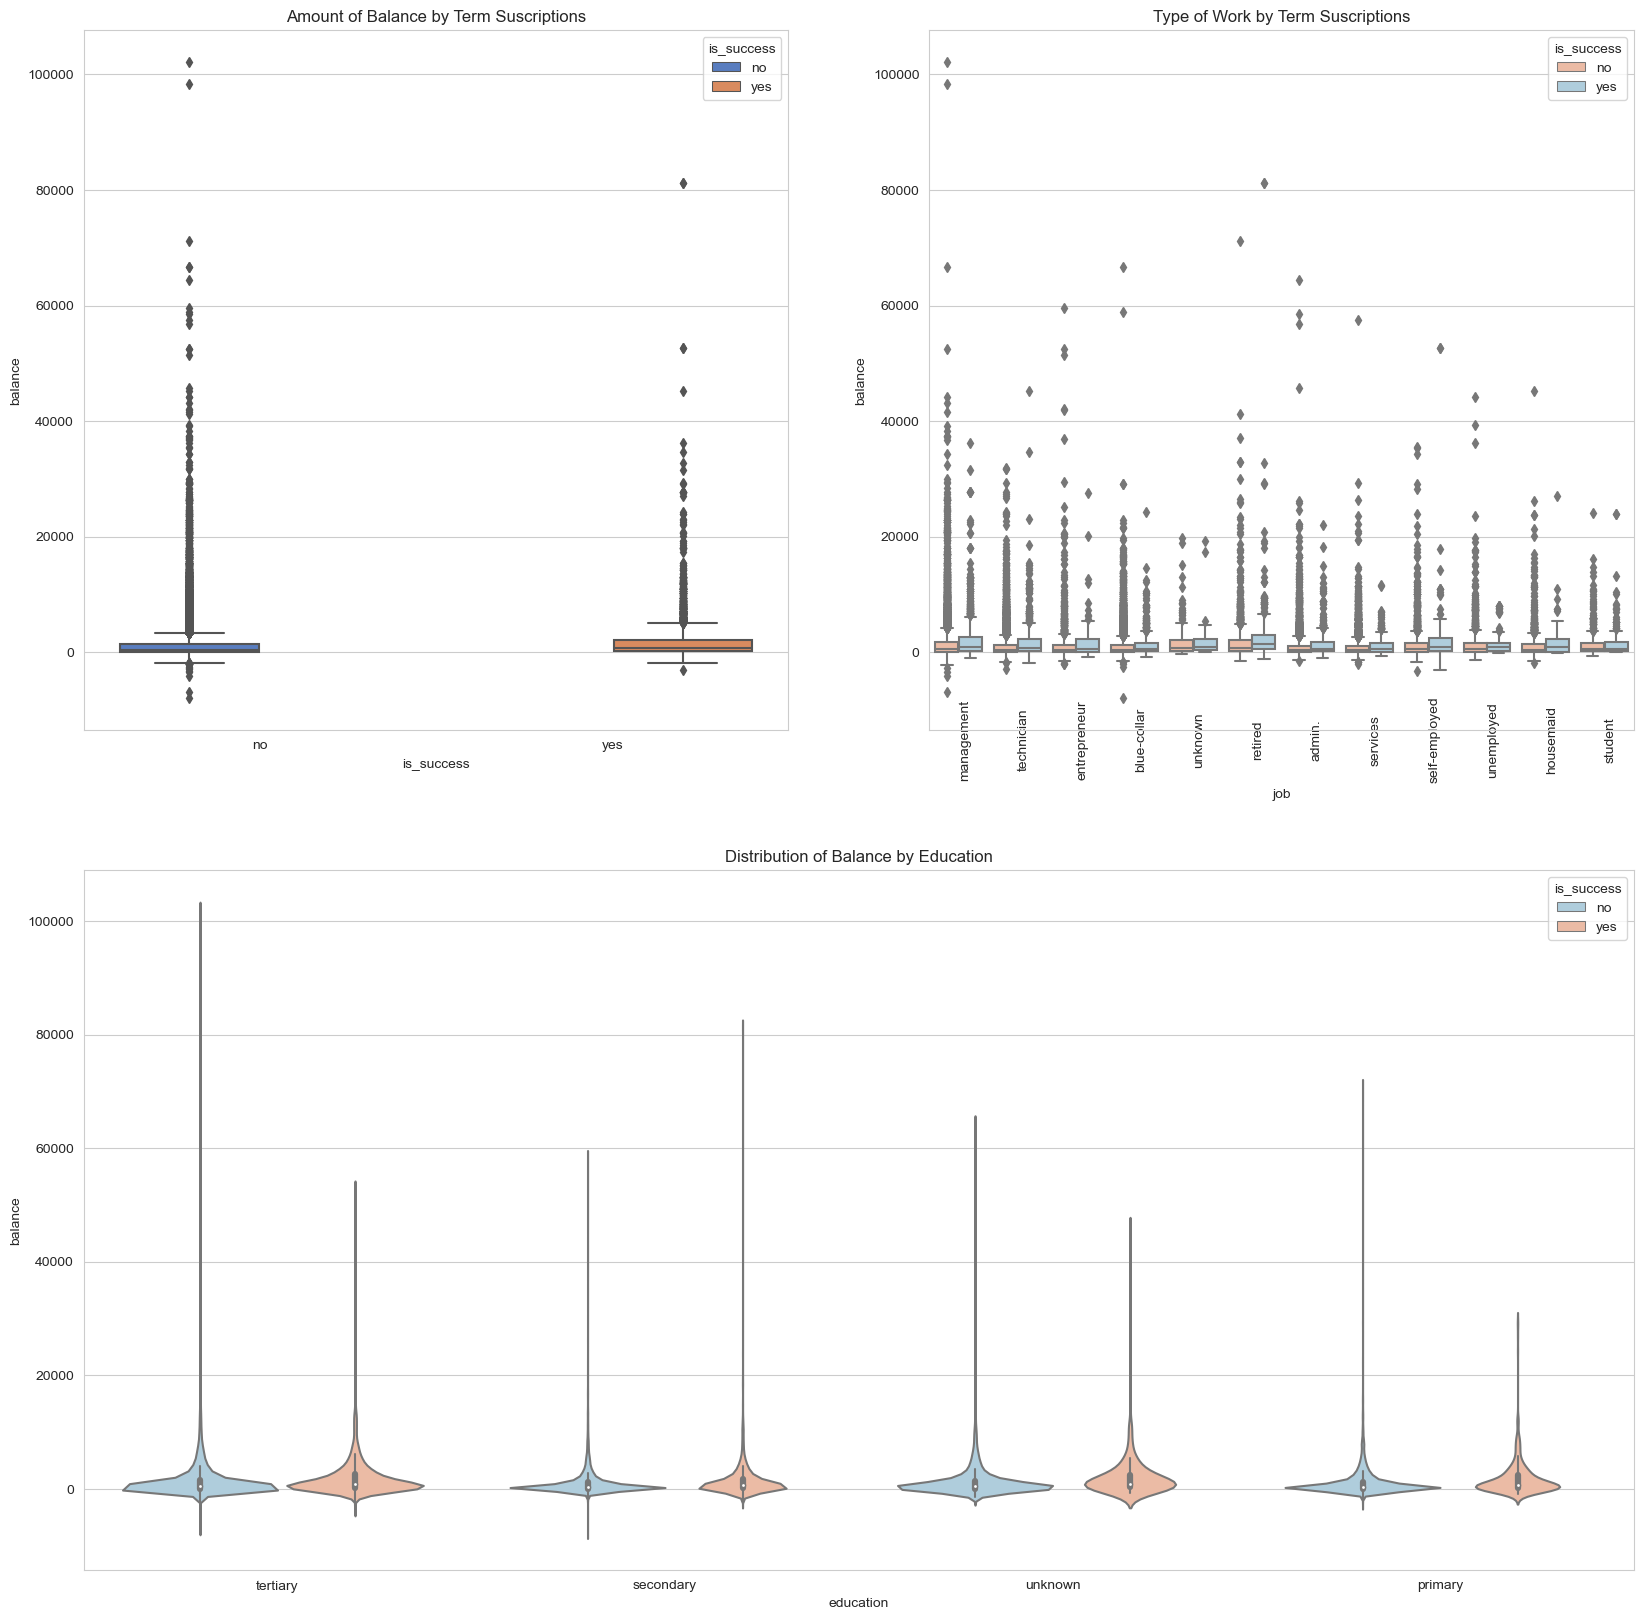

In [23]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="is_success", y="balance", hue="is_success",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="is_success",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="is_success", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

**Analysis by Occupation:**
- Number of Occupations: Management is the occupation that is more - prevalent in this dataset.
- Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
- Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [24]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'is_success', 'is_success_encoded'],
      dtype='object')

In [26]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)',
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700,
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [27]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["is_success"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed,
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)
fig.show()

In [120]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assign balance status
df['balance_status'] = pd.cut(df['balance'], bins=[-np.inf, 0, 30000, 40000, np.inf], labels=['negative', 'low', 'middle', 'high'])

# Group by job and balance status, calculate mean balance
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean().unstack()

# Create traces for each balance status
traces = []
colors = ['rgb(246, 46, 46)', 'rgb(246, 97, 46)', 'rgb(246, 179, 46)', 'rgb(46, 246, 78)']
for i, status in enumerate(job_balance.columns):
    trace = go.Barpolar(
        r=job_balance[status],
        theta=job_balance.index,
        name=status.title(),
        marker=dict(color=colors[i])
    )
    traces.append(trace)

# Define layout
layout = go.Layout(
    title='Mean Balance in Account by Job Occupation',
    font=dict(size=12),
    legend=dict(font=dict(size=16))
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
iplot(fig, filename='polar-area-chart')

### Marital Status 
Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [31]:
df['marital'].value_counts()

married     24752
single      11959
divorced     4726
Name: marital, dtype: int64

In [32]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [33]:
df['marital'].value_counts().tolist()

[24752, 11959, 4726]

In [34]:
import plotly.express as px

# Get value counts of marital status
vals = df['marital'].value_counts()

# Create bar plot using Plotly Express
fig = px.bar(x=vals.index, y=vals.values, labels={'x': 'Marital Status', 'y': 'Count'}, 
             title='Count by Marital Status', color_discrete_sequence=['#FE9A2E'])

# Show plot
fig.show()


In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Filter balances by marital status
single = df.loc[df['marital'] == 'single', 'balance']
married = df.loc[df['marital'] == 'married', 'balance']
divorced = df.loc[df['marital'] == 'divorced', 'balance']

# Create histograms for each marital status
histograms = []
for status, values, color in zip(['single', 'married', 'divorced'], [single, married, divorced], ['#6E6E6E', '#2E9AFE', '#FA5858']):
    histogram = go.Histogram(x=values, histnorm='density', name=status.capitalize(), marker_color=color)
    histograms.append(histogram)

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=("Single", "Married", "Divorced"))

# Add histograms to subplots
for i, histogram in enumerate(histograms, start=1):
    fig.add_trace(histogram, row=i, col=1)

# Update layout
fig.update_layout(showlegend=False, title="Price Distributions by Marital Status", height=1000, width=800)

# Show plot
pio.show(fig)


In [36]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   

  is_success  is_success_encoded balance_status  
0         no                   0            low  
1         no                   0            low  
2         no                   0            low  
3         no                   0            low  
5         no                   0            low

In [39]:
# Create facet grid plot
fig = px.scatter(df, x='duration', y='balance', color='marital', facet_col='marital',
                 facet_col_wrap=1, trendline='ols', opacity=1.0,
                 color_discrete_map={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'})

# Update marker size
fig.update_traces(marker=dict(size=10))

# Show plot
fig.show()

In [42]:
# Create facet grid plot for important clients with some high balances
fig = px.box(df, y='balance', facet_row='marital', color='is_success')

# Show plot
fig.show()

In [43]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   

  is_success  is_success_encoded balance_status  
0         no                   0            low  
1         no                   0            low  
2         no                   0            low  
3         no                   0            low  
5         no                   0            low

#### Clustering Marital Status and Education: 
    
- Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.
- Education: The level of education also has a significant impact on the amount of balance a prospect has.
- Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [45]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [46]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'


df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   

  is_success  is_success_encoded balance_status  marital/education  
0         no                   0            low   married/tertiary  
1         no                   0            low   single/secondary  
2         no                   0            low  married/secondary  
5         no                   0            low   married/tertiary  
6         no                   0            low    single/tertiary

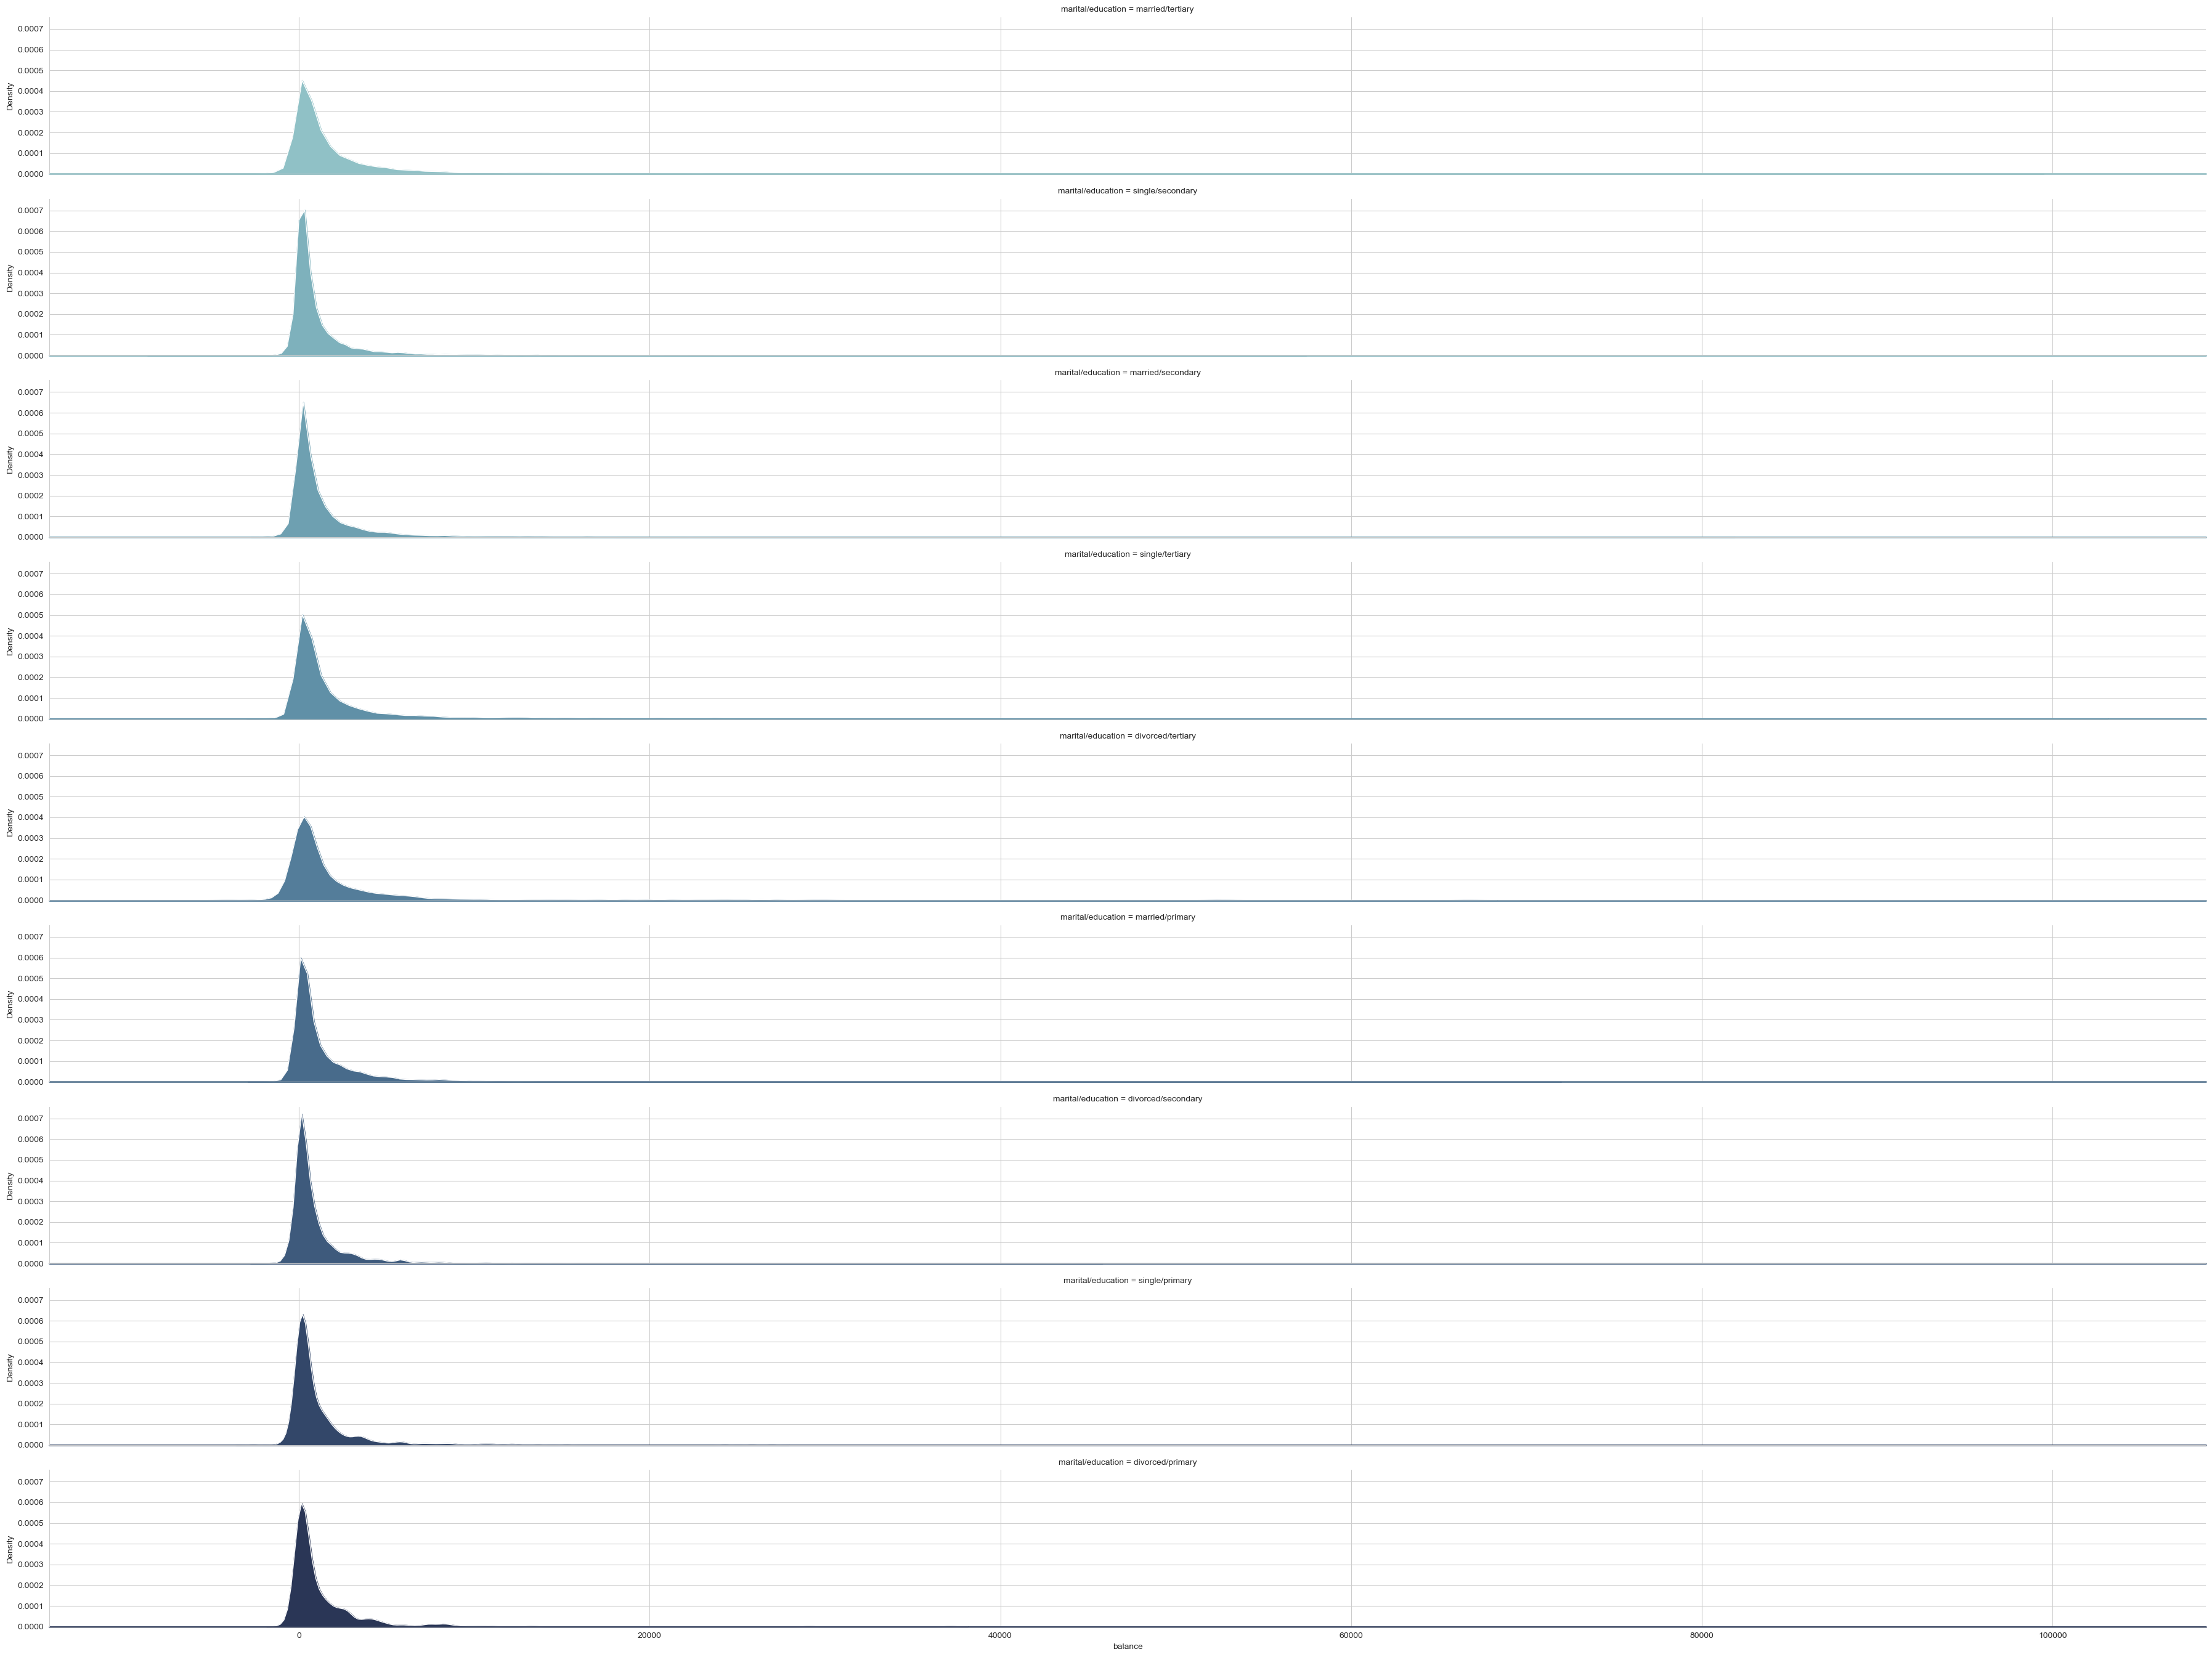

In [49]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw_adjust=0.5)  # Adjust bandwidth here
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw_adjust=0.5)  # Adjust bandwidth here
g.map(plt.axhline, y=0, lw=2, clip_on=False)


Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

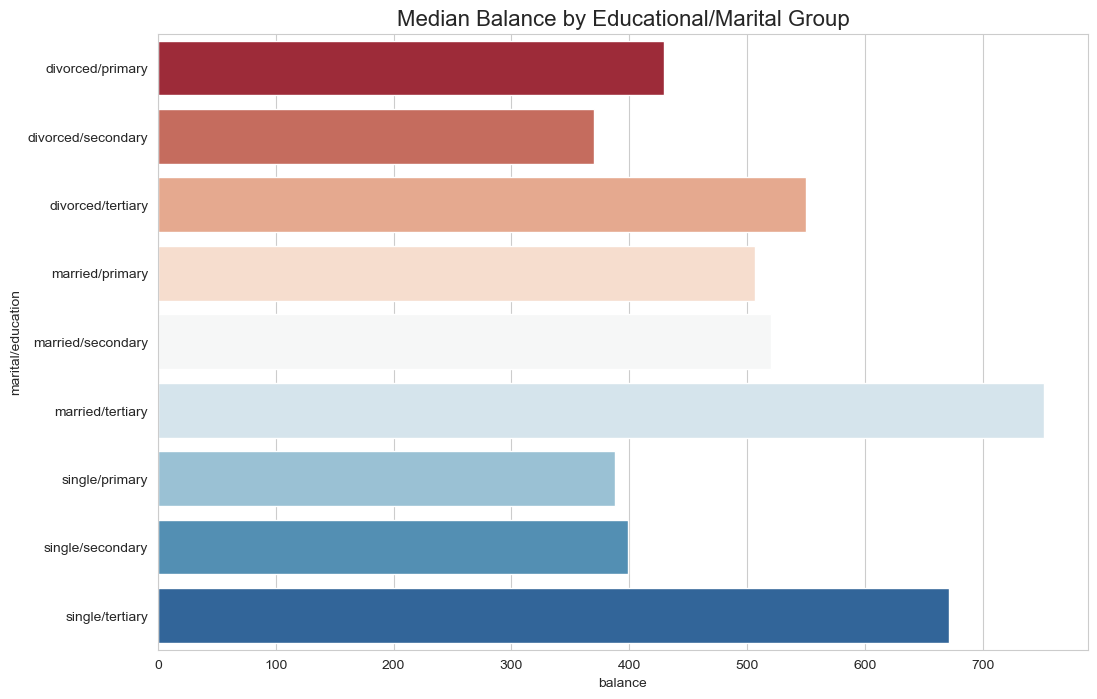

In [50]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [51]:
import plotly.graph_objects as go

# Group by 'marital/education' and 'loan' columns, calculate median balance
loan_balance = df.groupby(['marital/education', 'loan'])['balance'].median().reset_index()

# Separate data for 'no' and 'yes' loan groups
no_loan = loan_balance.loc[loan_balance['loan'] == 'no', 'balance']
has_loan = loan_balance.loc[loan_balance['loan'] == 'yes', 'balance']
labels = loan_balance['marital/education'].unique()

# Create scatter plots for 'no' and 'yes' loan groups
trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(color='rgb(0,139,139)', width=1),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(color='rgb(178,34,34)', width=1),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]

# Define layout
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        title='Median Balance',
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(color='rgb(204, 204, 204)'),
        tickfont=dict(color='rgb(102, 102, 102)'),
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    yaxis=dict(title='Marital/Educational Clusters'),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(font=dict(size=10), yanchor='middle', xanchor='right'),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest'
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()


In [52]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   

  is_success  is_success_encoded balance_status  marital/education  
0         no                   0            low   married/tertiary  
1         no                   0            low   single/secondary  
2         no                   0            low  married/secondary  
5         no                   0            low   married/tertiary  
6         no                   0            low    single/tertiary

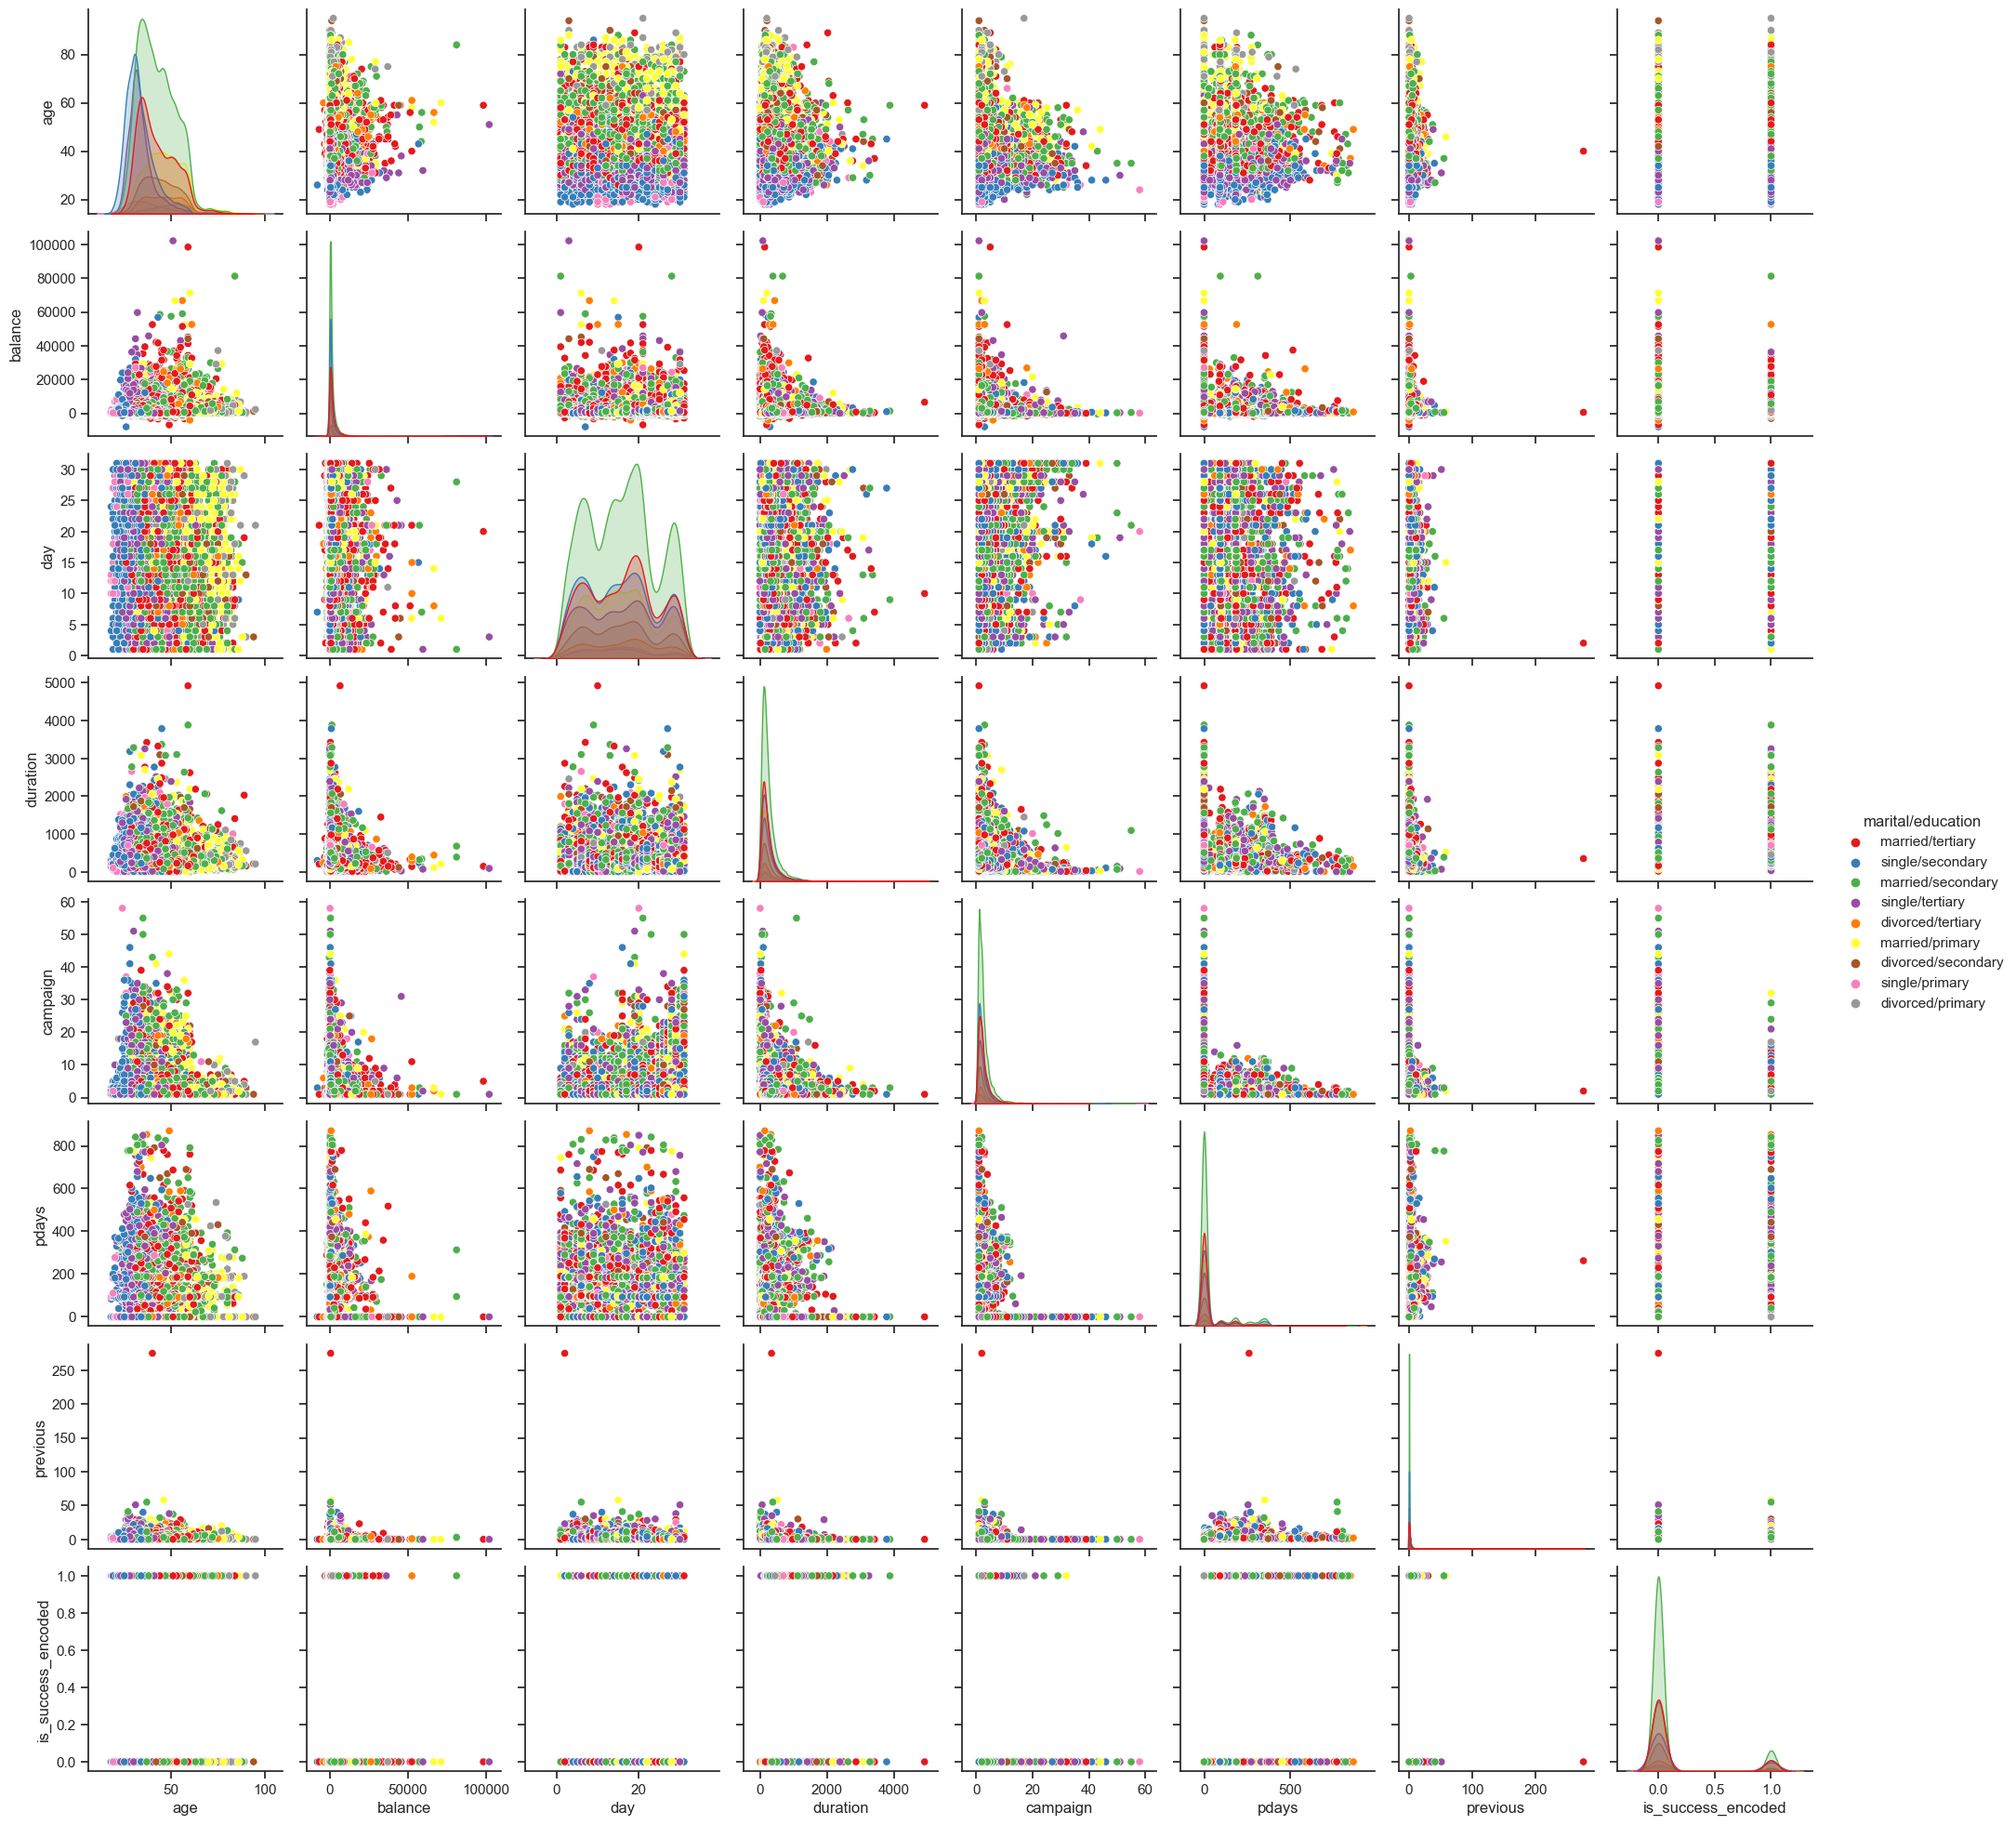

In [53]:
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

In [55]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   

  is_success  is_success_encoded balance_status  marital/education  
0         no                   0            low   married/tertiary  
1         no                   0            low   single/secondary  
2         no                   0            low  married/secondary  
5         no                   0            low   married/tertiary  
6         no                   0            low    single/tertiary

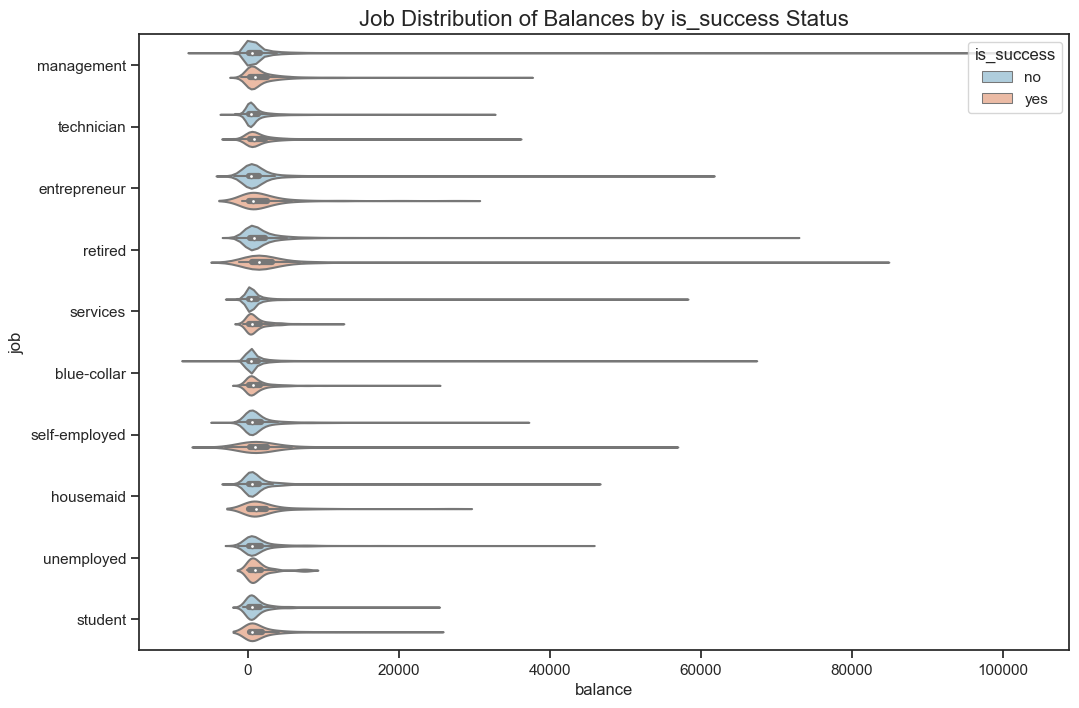

In [57]:
fig = plt.figure(figsize=(12,8))
sns.violinplot(x="balance", y="job", hue="is_success", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by is_success Status", fontsize=16)
plt.show()

#### Campaign Duration: 
 - Campaign Duration: We see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
 - Average Campaign Duration: The average campaign duration is 258.16, let's see if clients that were above this average were more likely to open a term deposit.
 - Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

In [58]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

In [59]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   

  is_success  is_success_encoded  
0         no                   0  
1         no                   0  
2         no                   0  
5         no                   0  
6         no                   0

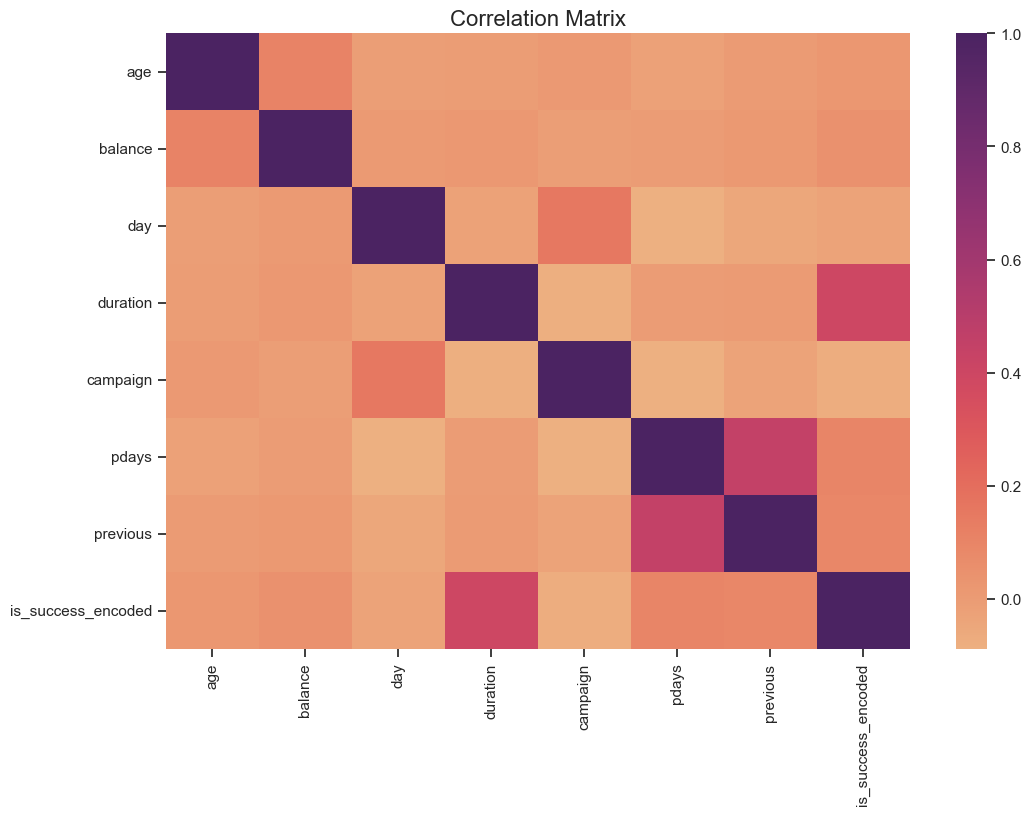

In [64]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits


fig = plt.figure(figsize=(12,8))

# Separate both dataframes into
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="flare")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

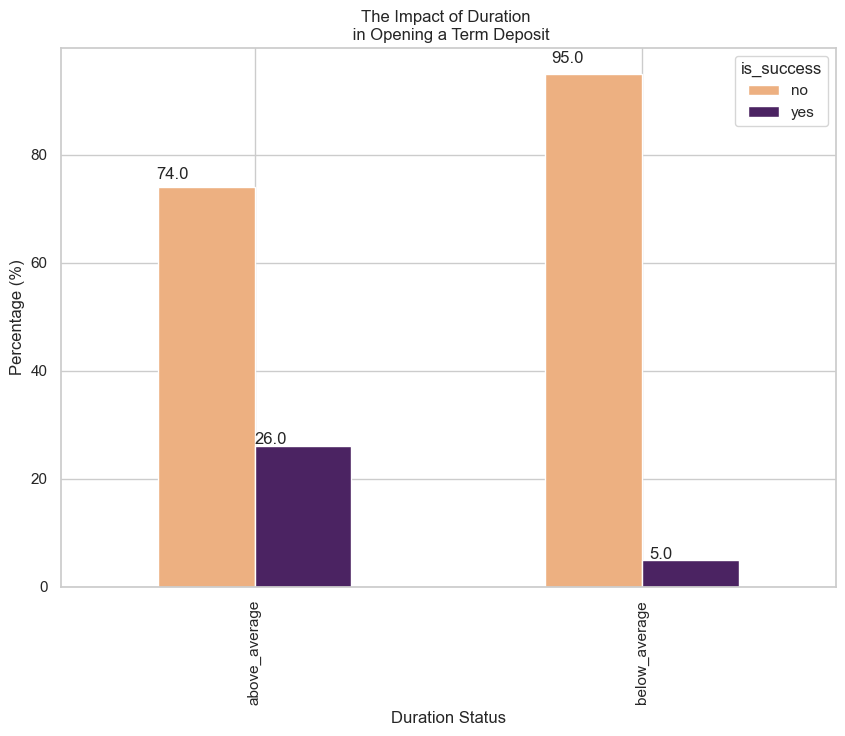

In [72]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"

pct_term = pd.crosstab(df['duration_status'], df['is_success']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='flare')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=12)
plt.xlabel("Duration Status", fontsize=12);
plt.ylabel("Percentage (%)", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))


plt.show()

# Phase 3: Modelling

In [74]:
dep = term_deposits['is_success']
term_deposits.drop(labels=['is_success'], axis=1,inplace=True)
term_deposits.insert(0, 'is_success', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [75]:
term_deposits["loan"].value_counts()/len(term_deposits)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

#### Stratified Sampling:
Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?


#### Personal Loans:
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?

- We need to see how our data is distributed.
- After noticiing that the column of loan contains 83% of "no" (Does not have personal loans) and 16% of "yes" (Have personal loans.)
- We want to make sure that our training and test set contains the same ratio of 83% "no" and 16% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]

stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

no     0.190675
yes    0.036382
Name: loan, dtype: float64

In [77]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['is_success'].value_counts()

no     31918
yes     4250
Name: is_success, dtype: int64

In [78]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 16225 to 19621
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   is_success  36168 non-null  object
 1   age         36168 non-null  int64 
 2   job         36168 non-null  object
 3   marital     36168 non-null  object
 4   education   36168 non-null  object
 5   default     36168 non-null  object
 6   balance     36168 non-null  int64 
 7   housing     36168 non-null  object
 8   loan        36168 non-null  object
 9   contact     36168 non-null  object
 10  day         36168 non-null  int64 
 11  month       36168 non-null  object
 12  duration    36168 non-null  int64 
 13  campaign    36168 non-null  int64 
 14  pdays       36168 non-null  int64 
 15  previous    36168 non-null  int64 
 16  poutcome    36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [82]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 0.28973669, -0.47478064,  0.86666845, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.47789334, -0.32307632,  1.82928814, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.00750171, -0.24362772, -1.29922585, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.85420663, -0.19523927, -1.05857093, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10158004, -0.44568218,  0.62601353, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.32459826, -0.38912001, -1.05857093, ...,  0.        ,
         0.        ,  1.        ]])

In [83]:
y_train = train_data['is_success']
y_test = test_data['is_success']
y_train.shape

(36168,)

In [84]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False, False, ..., False,  True, False])

In [85]:
some_instance = X_train[1250]

# Phase 4: Evaluation

In [86]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [89]:
import time

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose=True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 3)), columns=['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count, 'classifier'] = key
        df_results.loc[count, 'train_score'] = train_score
        df_results.loc[count, 'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count += 1
    return df_results


In [90]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 1.25 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 75.07 s
trained Gradient Boosting Classifier in 23.18 s
trained Decision Tree in 0.75 s
trained Random Forest in 1.21 s
trained Neural Net in 16.60 s
trained Naive Bayes in 0.06 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.746529
5                 Random Forest     0.997069       1.214066
1             Nearest Neighbors     0.921560       0.010063
2                    Linear SVM     0.914842      75.074601
3  Gradient Boosting Classifier     0.911966      23.178371
6                    Neural Net     0.903146      16.598812
0           Logistic Regression     0.902096       1.250232
7                   Naive Bayes     0.853489       0.058290


#### Avoiding Overfitting:
Brief Description of Overfitting?
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores.


How can we avoid Overfitting?
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [92]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Decision Tree', 'Gradeint Boosting CLF', 'Random Forest CLF', 'Neural Classifier', 'Naives Bayes'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [93]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
4  Gradeint Boosting CLF              0.905027
1                    SVC              0.902842
6      Neural Classifier              0.902317
7           Naives Bayes              0.902317
0          Logistic Reg.              0.901515
5      Random Forest CLF              0.899912
2                    KNN              0.893801
3          Decision Tree              0.874143

In [94]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [95]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.91


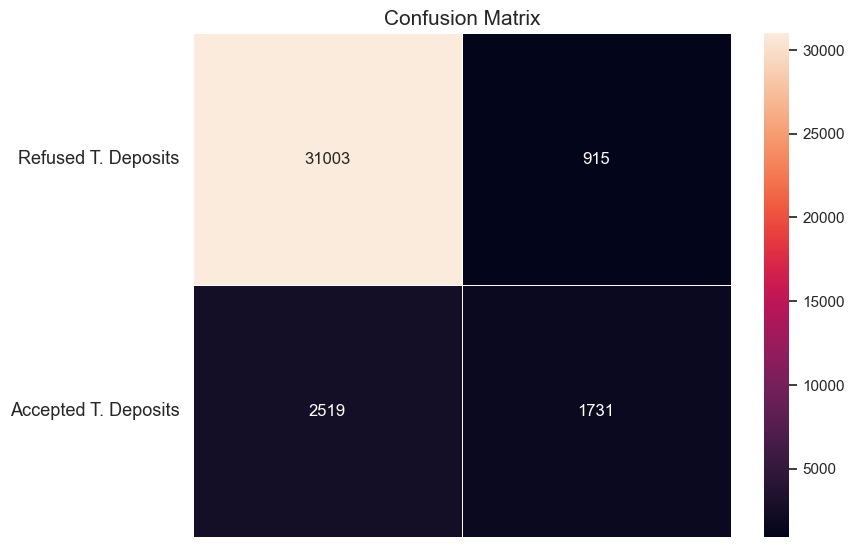

In [99]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=13, rotation=360)
plt.show()

In [100]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit.
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.6541950113378685
Recall Score:  0.4072941176470588


In [101]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.502030162412993

In [102]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-2.44755433])

In [103]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [104]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [105]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]

if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [106]:
y_scores.shape

(36168,)

In [107]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

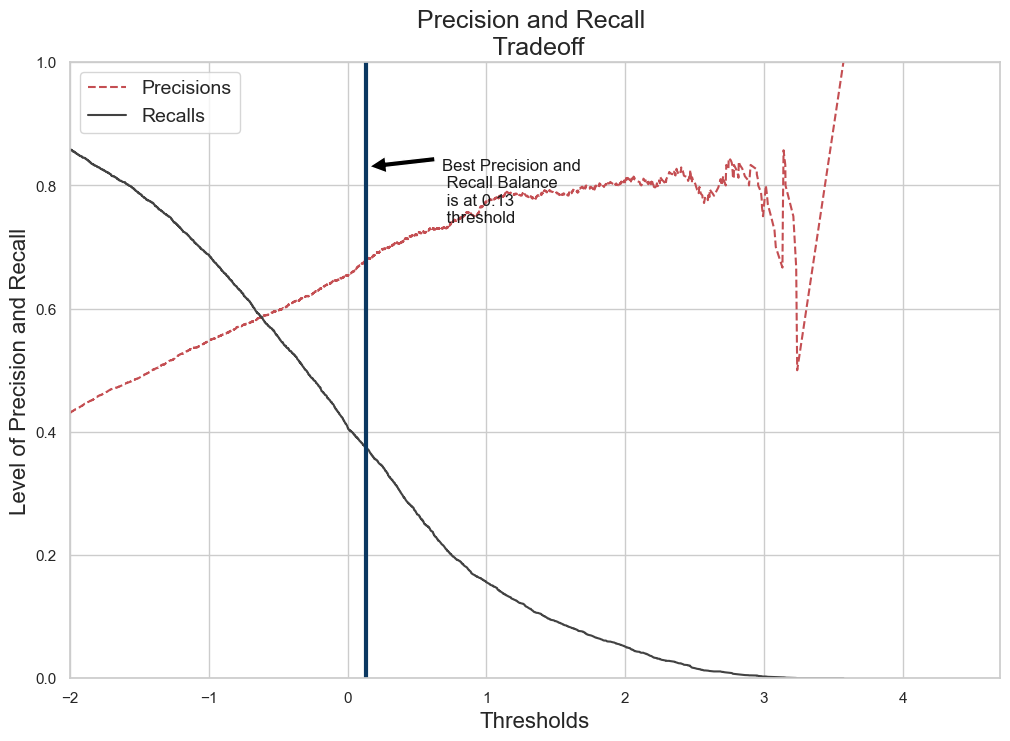

In [108]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12,
                color='k')

precision_recall_curve(precisions, recalls, threshold)
plt.show()

#### ROC Curve (Receiver Operating Characteristic):
The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

In [109]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

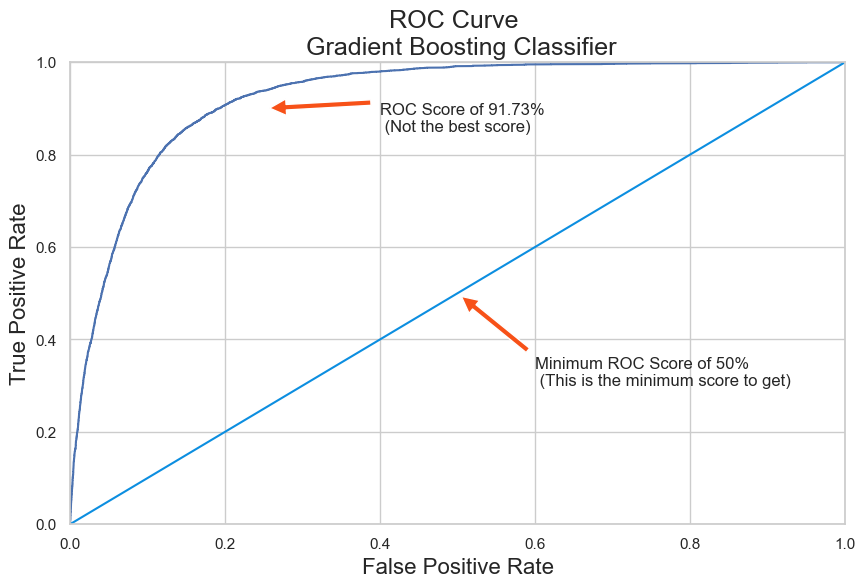

In [110]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )


graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [111]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9244616056586179
Neural Classifier Score:  0.909269783231295
Naives Bayes Classifier:  0.8062245791605694


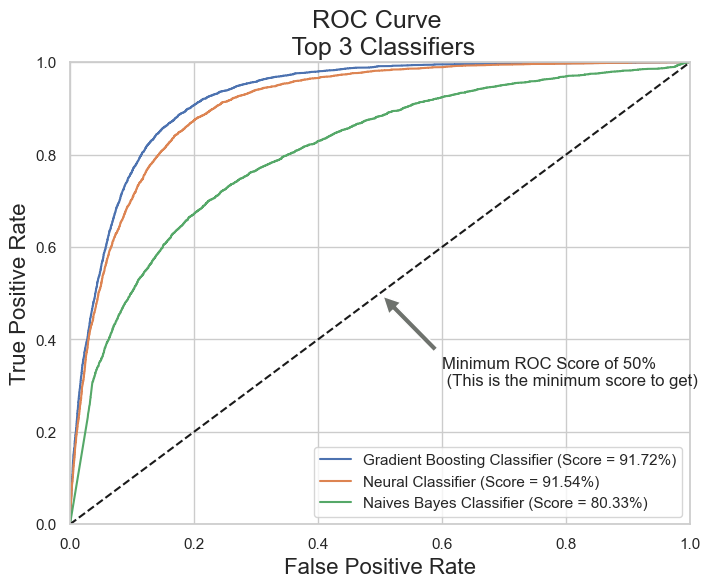

In [112]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

In [113]:
grad_clf.predict_proba([some_instance])

array([[0.92038242, 0.07961758]])

In [114]:
# Let's see what does our classifier predict.
grad_clf.predict([some_instance])

array([0])

In [115]:
y_train[1250]

0

### Which Features Influence the Result of a Term Deposit Suscription?
#### DecisionTreeClassifier:
The top three most important features for our classifier are 
- Duration (how long it took the conversation between the sales representative and the potential client), 
- Contact (number of contacts to the potential client within the same marketing campaign), 
- Month (the month of the year).

Feature ranking:
1. feature 11 (0.513799)
2. feature 13 (0.103143)
3. feature 8 (0.097924)
4. feature 10 (0.097532)
5. feature 15 (0.071267)
6. feature 6 (0.047296)
7. feature 0 (0.045423)
8. feature 5 (0.013208)
9. feature 12 (0.005167)
10. feature 9 (0.002631)
11. feature 3 (0.002346)
12. feature 2 (0.000264)
13. feature 14 (0.000000)
14. feature 7 (0.000000)
15. feature 4 (0.000000)
16. feature 1 (0.000000)


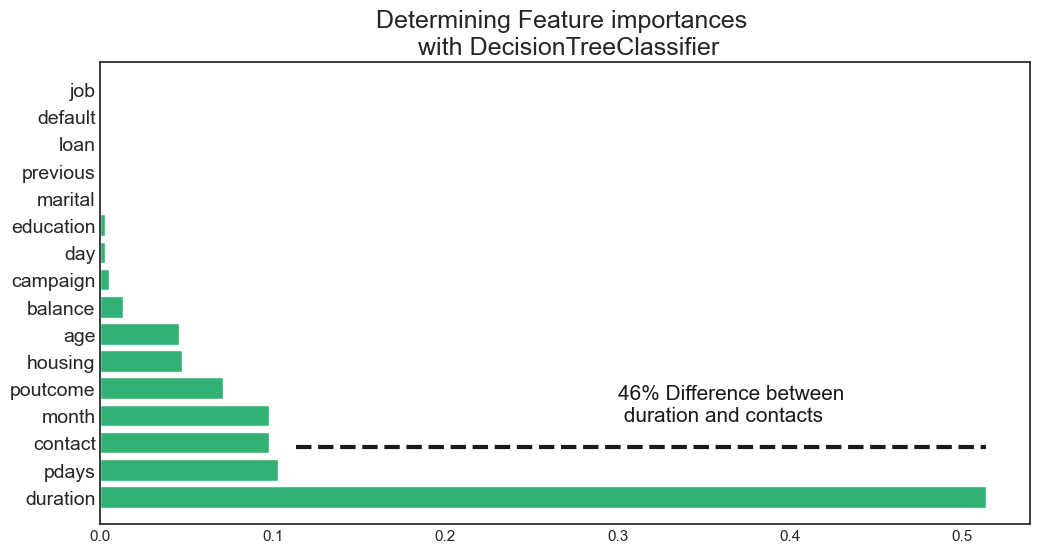

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'is_success'
X = term_deposits.drop('is_success', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01

)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('is_success', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)

feature_importance_graph(indices, importances, feature_names)
plt.show()

**Gradient Boosting classifier** is the best model to predict whether or not a potential client will suscribe to a term deposit or not. **90.33%** accuracy!

In [118]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(alpha=1))],
                 voting='soft')

In [119]:
from sklearn.metrics import accuracy_score

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.9033506579674887
GaussianNB 0.8445206236868296
MLPClassifier 0.8887537321685282
VotingClassifier 0.8930664602454937


# Phase 4.1: Conclusion

1. **Focus Marketing Activity**: The bank should concentrate its marketing efforts on months like <b>March, September, October, and December</b> to improve subscription rates, avoiding May which had the lowest effectiveness.

2. **Seasonal Trends**: Clients tend to subscribe to term deposits during <b>fall and winter</b>, suggesting a focus on marketing during these seasons.

3. **Limit Campaign Calls**: Implement a policy limiting calls to each potential client to three to avoid diminishing returns and save time and effort in acquiring new clients.

4. **Target Age Groups**: Target clients in their <b>20s or younger and 60s or older</b>, as they have the highest likelihood of subscribing to term deposits (60% and 76%, respectively).

5. **Occupation Focus**: Target <b>retired individuals and students</b>, who are most likely to subscribe to term deposits due to their financial habits and needs.

6. **Balance and Loans**: Focus on potential <b>clients with average and high balances</b>, as they are less likely to have house loans and more likely to subscribe to term deposits.

7. **Engage During Calls**: Develop engaging questionnaires to increase conversation length during calls, potentially leading to higher subscription rates.

8. **Target High Duration**: Focus on potential clients with a <b>duration above 375</b>, as they have a 78% likelihood of opening a term deposit account, ensuring a higher success rate for the campaign.


By implementing these strategies and refining the target audience, the bank's next marketing campaign is expected to be more effective than the current one.

# Phase 5: Deployment